In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import pickle
import sys
sys.path.append('/workspace/Eval/')
from counterfactual_explanation.utils.helpers import (
    load_all_configuration_with_data_name, load_configuration_from_yaml)
from counterfactual_explanation.utils.mlcatalog import model_prediction
import pandas as pd
from config.config import Config
import config.setup as setup
import numpy as np
from tqdm import tqdm
import glob
import json
args = setup.setup(Config)
CONFIG_PATH = '/workspace/Eval/configuration/data_catalog.yaml'
CONFIG_FOR_PROJECT = '/workspace/Eval/configuration/project_configurations.yaml'
data_config = load_configuration_from_yaml(CONFIG_PATH)
configuration_for_proj = load_configuration_from_yaml(CONFIG_FOR_PROJECT)

def trans_to_device(variable):
    if torch.cuda.is_available() and args.device == 'cuda':
        return variable.cuda()
    else:
        return variable.cpu()

/root/.local/share/virtualenvs/workspace-dqq3IVyd/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


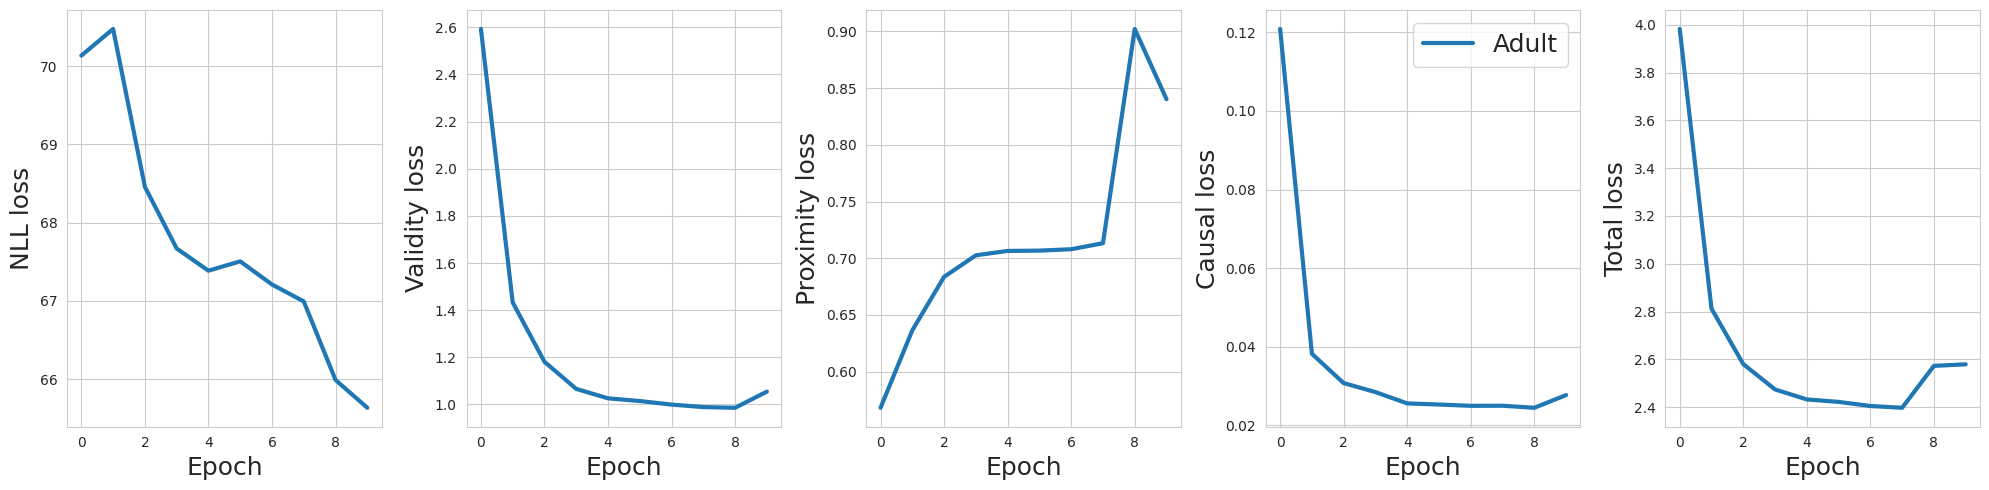

In [4]:
data_names = ['adult']
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

for data_name in data_names:
    with open(configuration_for_proj['fastdcflow_model_targetenc_causal_' + data_name + '_history'], 'r') as f:
        history = json.load(f)
        history = pd.DataFrame(history)

    loss_type = ['flow_loss', 'y_loss', 'prox_loss', 'causal_loss', 'total_loss']
    for i in range(5):
        if data_name == 'adult':
            data_name = 'Adult'
        elif data_name == 'bank':
            data_name = 'Bank'
        elif data_name == 'turnover':
            data_name = 'Churn'
        ax[i].plot(history[loss_type[i]], label=data_name, linewidth=3)
        ax[i].set_xlabel('Epoch', fontsize=18)
        if i == 0:
            loss_type[i] = 'NLL loss'
        elif i == 1:
            loss_type[i] = 'Validity loss'
        elif i == 2:
            loss_type[i] = 'Proximity loss'
        elif i == 3:
            loss_type[i] = 'Causal loss'
        elif i == 4:
            loss_type[i] = 'Total loss'
        ax[i].set_ylabel(loss_type[i], fontsize=18)
        if i == 3:
            ax[i].legend(prop={'size': 18})
plt.tight_layout()
plt.show()

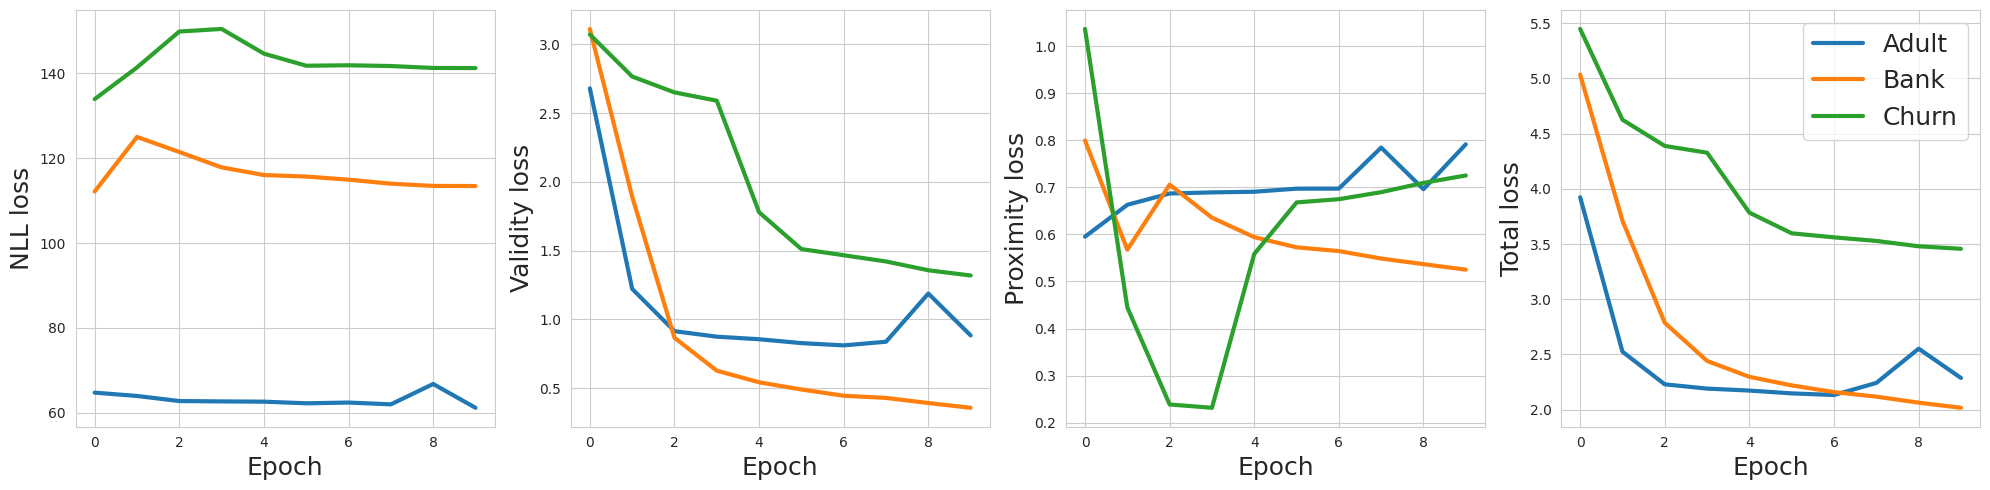

In [8]:
data_names = ['adult', 'bank', 'turnover']
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for data_name in data_names:
    with open(configuration_for_proj['cf_flow_model_targetenc_' + data_name + '_history'], 'r') as f:
        history = json.load(f)
        history = pd.DataFrame(history)

    loss_type = ['flow_loss', 'y_loss', 'prox_loss', 'total_loss']
    for i in range(4):
        if data_name == 'adult':
            data_name = 'Adult'
        elif data_name == 'bank':
            data_name = 'Bank'
        elif data_name == 'turnover':
            data_name = 'Churn'
        ax[i].plot(history[loss_type[i]], label=data_name, linewidth=3)
        ax[i].set_xlabel('Epoch', fontsize=18)
        if i == 0:
            loss_type[i] = 'NLL loss'
        elif i == 1:
            loss_type[i] = 'Validity loss'
        elif i == 2:
            loss_type[i] = 'Proximity loss'
        elif i == 3:
            loss_type[i] = 'Total loss'
        ax[i].set_ylabel(loss_type[i], fontsize=18)
        if i == 3:
            ax[i].legend(prop={'size': 18})
plt.tight_layout()
plt.show()

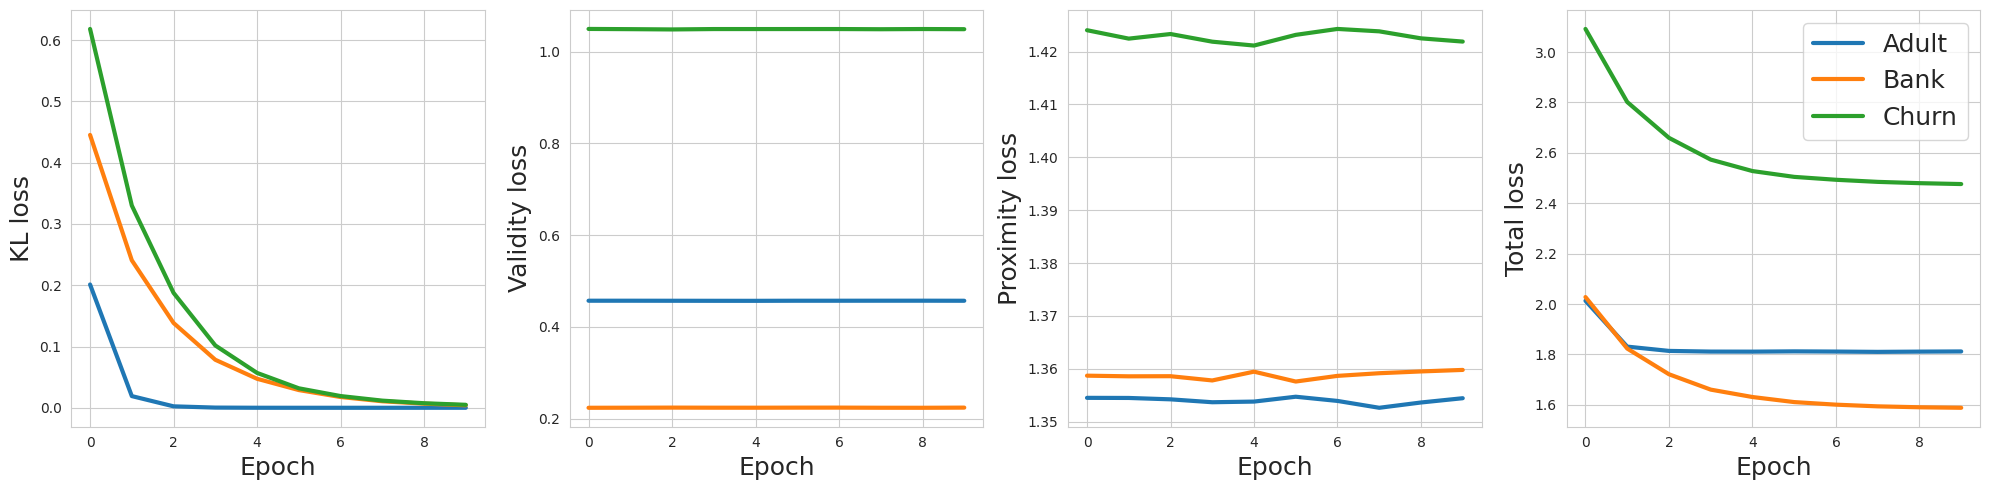

In [11]:
data_names = ['adult', 'bank', 'turnover']
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for data_name in data_names:
    with open(configuration_for_proj['cf_vae_model_targetenc_' + data_name + '_history'], 'r') as f:
        history = json.load(f)
        history = pd.DataFrame(history)

    loss_type = ['kl_loss', 'y_loss', 'prox_loss', 'total_loss']
    for i in range(4):
        if data_name == 'adult':
            data_name = 'Adult'
        elif data_name == 'bank':
            data_name = 'Bank'
        elif data_name == 'turnover':
            data_name = 'Churn'
        ax[i].plot(history[loss_type[i]], label=data_name, linewidth=3)
        ax[i].set_xlabel('Epoch', fontsize=18)
        if i == 0:
            loss_type[i] = 'KL loss'
        elif i == 1:
            loss_type[i] = 'Validity loss'
        elif i == 2:
            loss_type[i] = 'Proximity loss'
        elif i == 3:
            loss_type[i] = 'Total loss'
        ax[i].set_ylabel(loss_type[i], fontsize=18)
        if i == 3:
            ax[i].legend(prop={'size': 18})
plt.tight_layout()
plt.show()

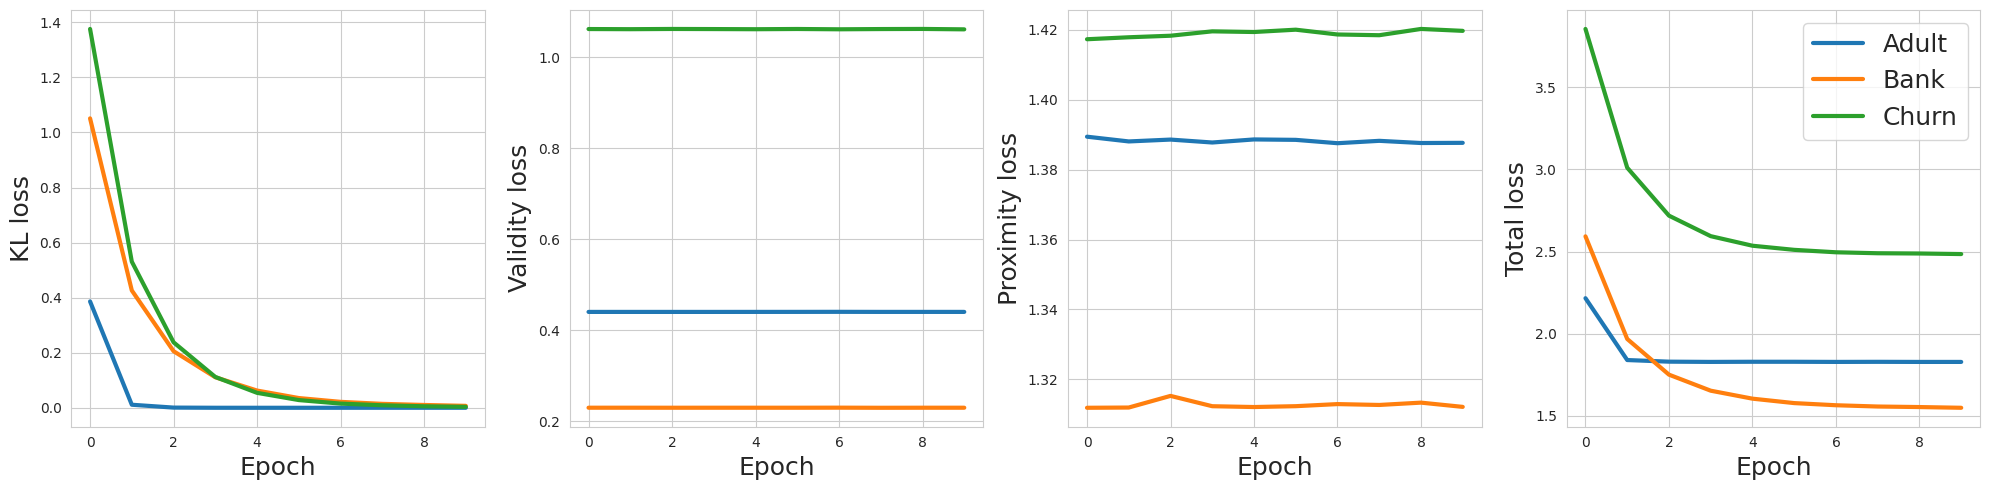

In [12]:
data_names = ['adult', 'bank', 'turnover']
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for data_name in data_names:
    with open(configuration_for_proj['cf_cvae_model_targetenc_' + data_name + '_history'], 'r') as f:
        history = json.load(f)
        history = pd.DataFrame(history)

    loss_type = ['kl_loss', 'y_loss', 'prox_loss', 'total_loss']
    for i in range(4):
        if data_name == 'adult':
            data_name = 'Adult'
        elif data_name == 'bank':
            data_name = 'Bank'
        elif data_name == 'turnover':
            data_name = 'Churn'
        ax[i].plot(history[loss_type[i]], label=data_name, linewidth=3)
        ax[i].set_xlabel('Epoch', fontsize=18)
        if i == 0:
            loss_type[i] = 'KL loss'
        elif i == 1:
            loss_type[i] = 'Validity loss'
        elif i == 2:
            loss_type[i] = 'Proximity loss'
        elif i == 3:
            loss_type[i] = 'Total loss'
        ax[i].set_ylabel(loss_type[i], fontsize=18)
        if i == 3:
            ax[i].legend(prop={'size': 18})
plt.tight_layout()
plt.show()

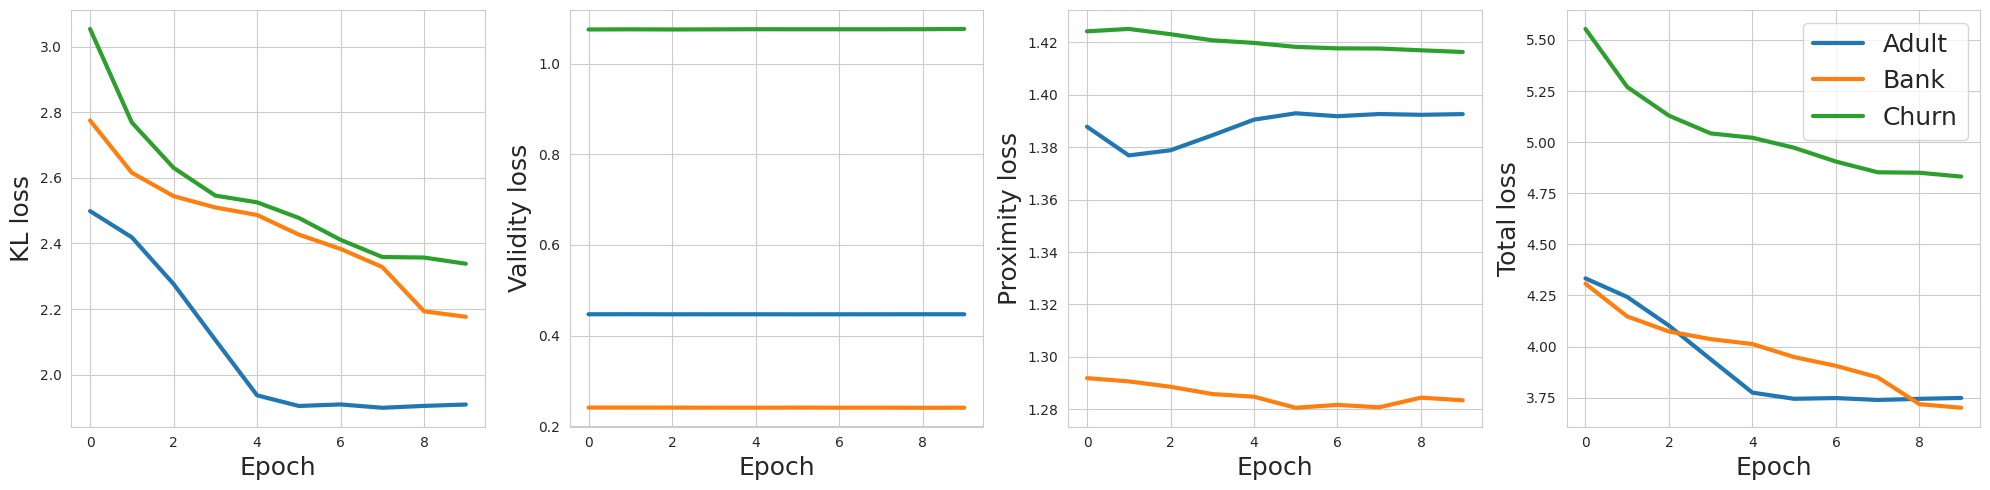

In [13]:
data_names = ['adult', 'bank', 'turnover']
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for data_name in data_names:
    with open(configuration_for_proj['cf_duvae_model_targetenc_' + data_name + '_history'], 'r') as f:
        history = json.load(f)
        history = pd.DataFrame(history)

    loss_type = ['kl_loss', 'y_loss', 'prox_loss', 'total_loss']
    for i in range(4):
        if data_name == 'adult':
            data_name = 'Adult'
        elif data_name == 'bank':
            data_name = 'Bank'
        elif data_name == 'turnover':
            data_name = 'Churn'
        ax[i].plot(history[loss_type[i]], label=data_name, linewidth=3)
        ax[i].set_xlabel('Epoch', fontsize=18)
        if i == 0:
            loss_type[i] = 'KL loss'
        elif i == 1:
            loss_type[i] = 'Validity loss'
        elif i == 2:
            loss_type[i] = 'Proximity loss'
        elif i == 3:
            loss_type[i] = 'Total loss'
        ax[i].set_ylabel(loss_type[i], fontsize=18)
        if i == 3:
            ax[i].legend(prop={'size': 18})
plt.tight_layout()
plt.show()

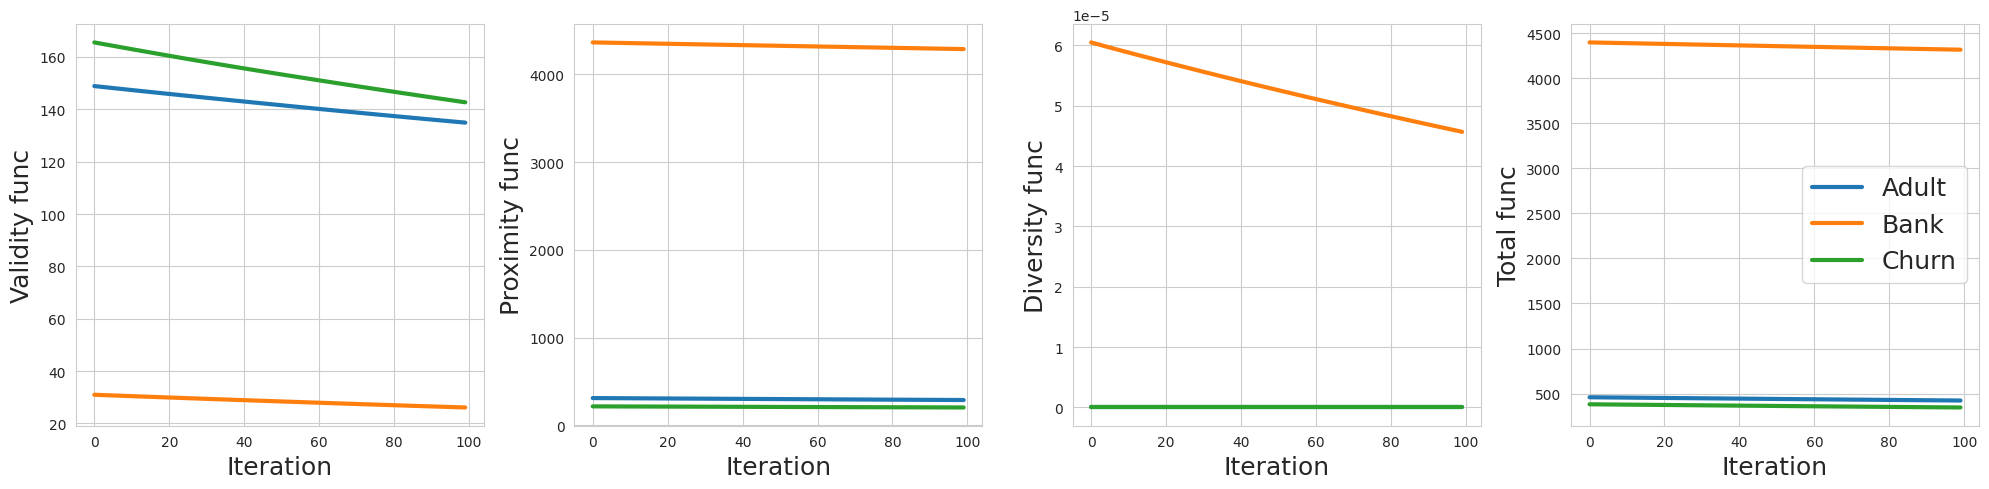

In [15]:
data_names = ['adult', 'bank', 'turnover']
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for data_name in data_names:
    with open(configuration_for_proj['cf_dice_targetenc_' + data_name + '_history'], 'r') as f:
        history = json.load(f)

    loss_type = ['yloss', 'proximity_loss', 'diversity_loss', 'total_loss']
    for i in range(4):
        if data_name == 'adult':
            data_name = 'Adult'
        elif data_name == 'bank':
            data_name = 'Bank'
        elif data_name == 'turnover':
            data_name = 'Churn'
        ax[i].plot(range(len(history[loss_type[i]][0])), history[loss_type[i]][0], label=data_name, linewidth=3)
        ax[i].set_xlabel('Iteration', fontsize=18)
        if i == 0:
            loss_type[i] = 'Validity func'
        elif i == 1:
            loss_type[i] = 'Proximity func'
        elif i == 2:
            loss_type[i] = 'Diversity func'
        elif i == 3:
            loss_type[i] = 'Total func'
        ax[i].set_ylabel(loss_type[i], fontsize=18)
        if i == 3:
            ax[i].legend(prop={'size': 18})
plt.tight_layout()
plt.show()

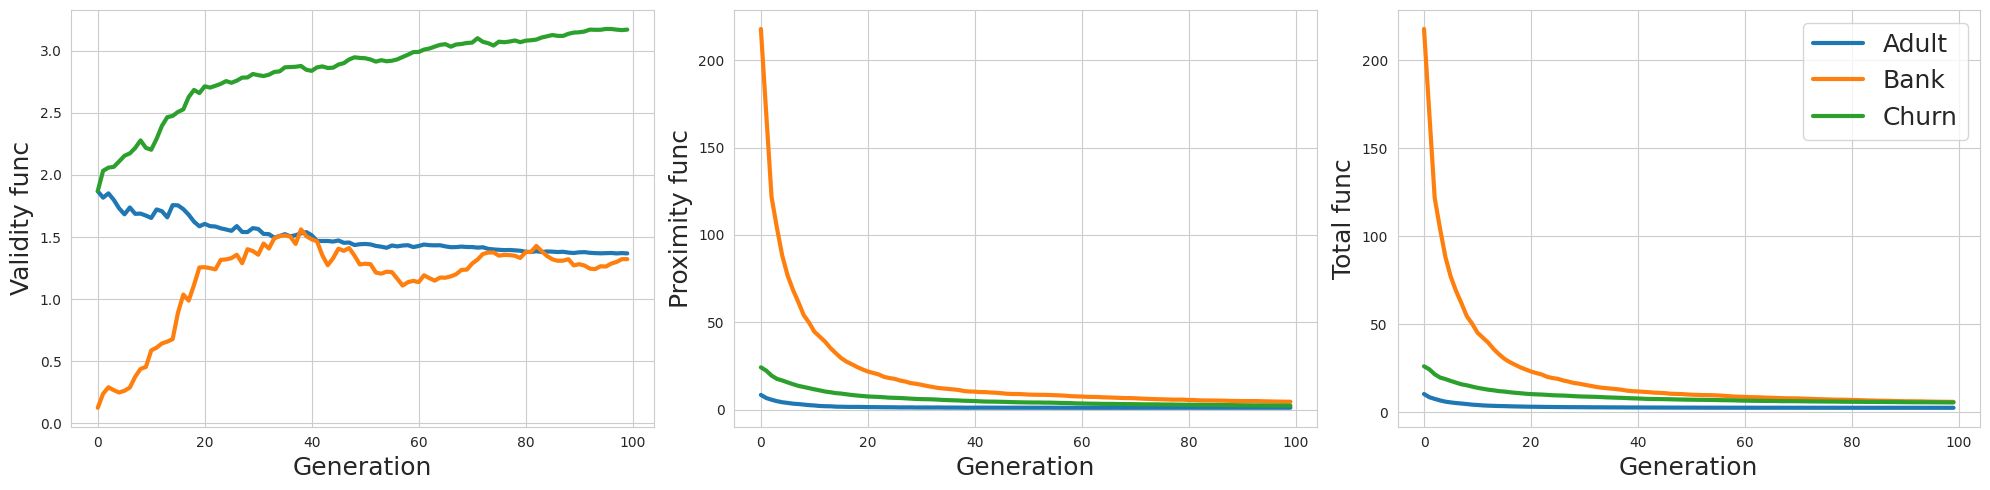

In [17]:
data_names = ['adult', 'bank', 'turnover']
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for data_name in data_names:
    with open(configuration_for_proj['cf_ga_targetenc_' + data_name + '_history'], 'r') as f:
        history = json.load(f)

    loss_type = ['yloss', 'proximity_loss', 'total_loss']
    for i in range(3):
        if data_name == 'adult':
            data_name = 'Adult'
        elif data_name == 'bank':
            data_name = 'Bank'
        elif data_name == 'turnover':
            data_name = 'Churn'
        ax[i].plot(range(len(history[loss_type[i]][0])), history[loss_type[i]][0], label=data_name, linewidth=3)
        ax[i].set_xlabel('Generation', fontsize=18)
        if i == 0:
            loss_type[i] = 'Validity func'
        elif i == 1:
            loss_type[i] = 'Proximity func'
        elif i == 2:
            loss_type[i] = 'Total func'
        ax[i].set_ylabel(loss_type[i], fontsize=18)
        if i == 2:
            ax[i].legend(prop={'size': 18})
plt.tight_layout()
plt.show()

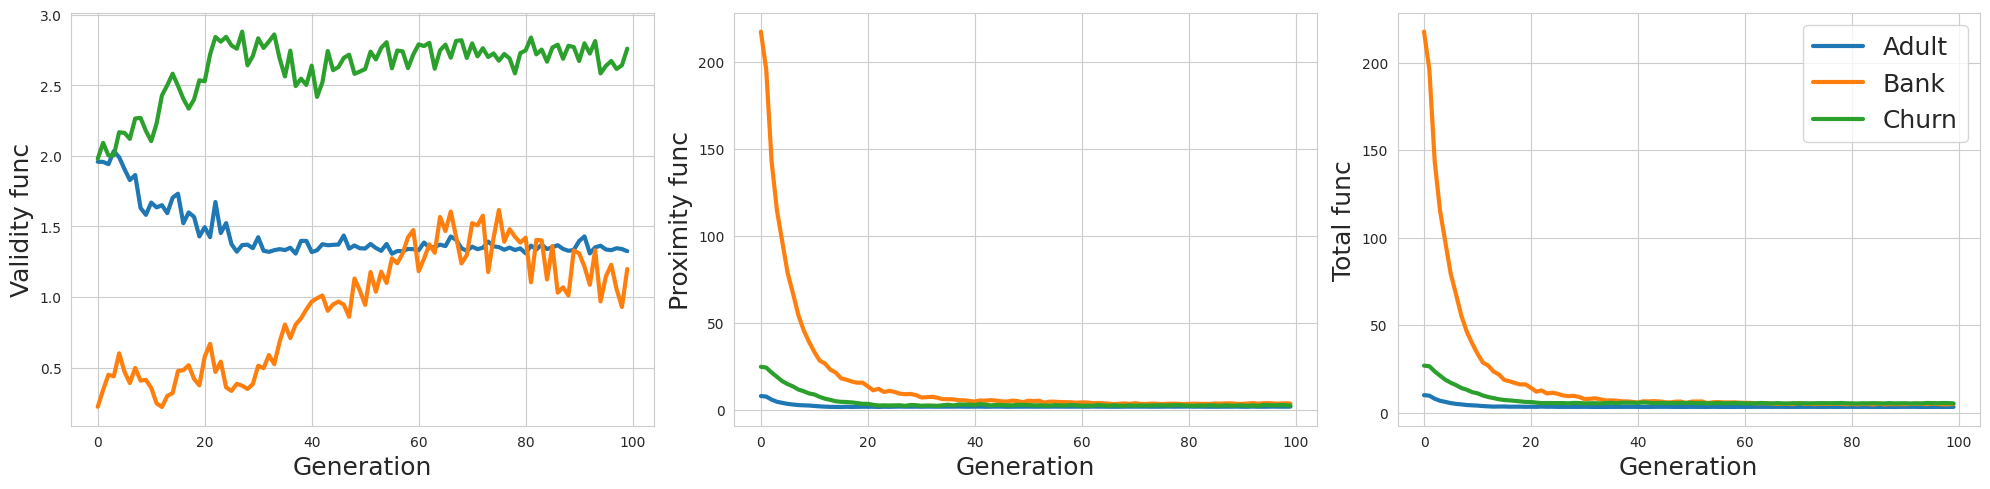

In [19]:
data_names = ['adult', 'bank', 'turnover']
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for data_name in data_names:
    with open(configuration_for_proj['cf_moga_targetenc_' + data_name + '_history'], 'r') as f:
        history = json.load(f)

    loss_type = ['yloss', 'proximity_loss', 'total_loss']
    for i in range(3):
        if data_name == 'adult':
            data_name = 'Adult'
        elif data_name == 'bank':
            data_name = 'Bank'
        elif data_name == 'turnover':
            data_name = 'Churn'
        ax[i].plot(range(len(history[loss_type[i]][0])), history[loss_type[i]][0], label=data_name, linewidth=3)
        ax[i].set_xlabel('Generation', fontsize=18)
        if i == 0:
            loss_type[i] = 'Validity func'
        elif i == 1:
            loss_type[i] = 'Proximity func'
        elif i == 2:
            loss_type[i] = 'Total func'
        ax[i].set_ylabel(loss_type[i], fontsize=18)
        if i == 2:
            ax[i].legend(prop={'size': 18})
plt.tight_layout()
plt.show()

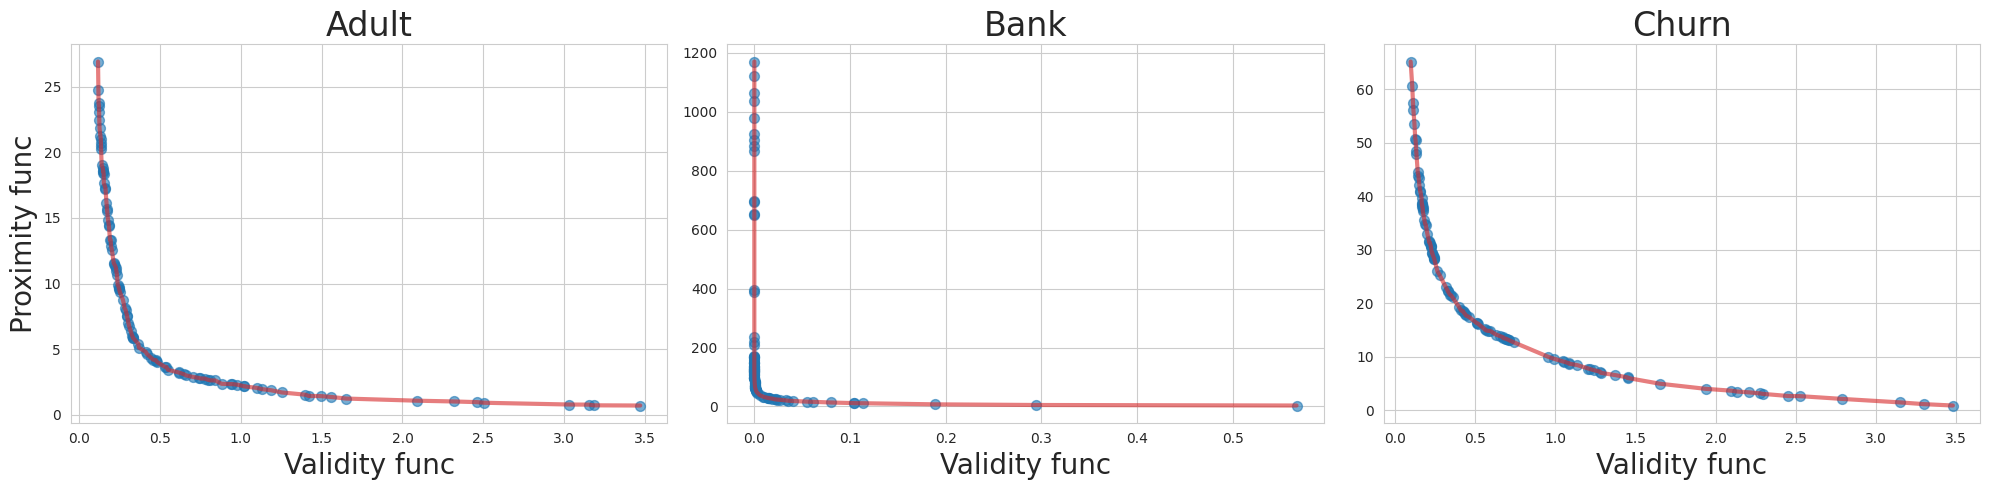

In [29]:
data_names = ['adult', 'bank', 'turnover']
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for idx, data_name in enumerate(data_names):
    loss_df = pd.read_csv(configuration_for_proj[f'cfs_cf_moga_targetenc_loss_{data_name}'] + 'neg_1.csv')[:args.total_cfs]
    loss_df = loss_df.sort_values(by='yloss')
    if data_name == 'adult':
        data_name = 'Adult'
    elif data_name == 'bank':
        
        data_name = 'Bank'
    elif data_name == 'turnover':
        data_name = 'Churn'
    ax[idx].scatter(loss_df['yloss'], loss_df['prox_loss'], alpha=0.6, s=50)
    ax[idx].plot(loss_df['yloss'], loss_df['prox_loss'], color='tab:red', linewidth=3, alpha=0.6)
    ax[idx].set_title(data_name, fontsize=24)
    ax[idx].set_xlabel('Validity func', fontsize=20)
    if idx == 0:
        ax[idx].set_ylabel('Proximity func', fontsize=20)
plt.tight_layout()
plt.show()

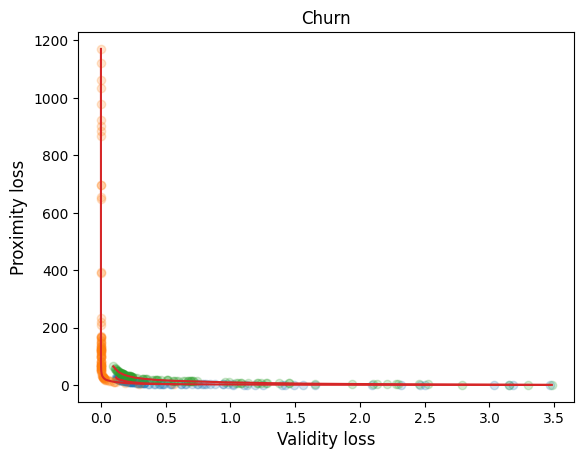

In [4]:
data_names = ['adult', 'bank', 'turnover']

for idx, data_name in enumerate(data_names):
    loss_df = pd.read_csv(configuration_for_proj[f'cfs_cf_moga_targetenc_loss_{data_name}'] + 'neg_1.csv')[:args.total_cfs]
    loss_df = loss_df.sort_values(by='yloss')
    if data_name == 'adult':
        data_name = 'Adult'
    elif data_name == 'bank':
        
        data_name = 'Bank'
    elif data_name == 'turnover':
        data_name = 'Churn'
    plt.scatter(loss_df['yloss'], loss_df['prox_loss'], alpha=0.2)
    plt.plot(loss_df['yloss'], loss_df['prox_loss'], color='tab:red')
    plt.title(data_name, fontsize=12)
    plt.xlabel('Validity loss', fontsize=12)
    plt.ylabel('Proximity loss', fontsize=12)
#plt.tight_layout()
plt.show()

In [2]:
data_names = ['adult', 'bank', 'churn']
# targetenc_origin_avg = [0.14333, 0.12585, 0.15598]
# onehotenc_origin_avg = [0.13031, 0.11146, 0.13905]
targetenc_target_values_avgs = []
onehotenc_target_values_avgs = []
for data_name in data_names:
    CFS_TARGETENC_PATH = configuration_for_proj['cfs_fastdcflow' + '_targetenc_' + data_name] + "neg_"
    CFS_ONEHOTENC_PATH = configuration_for_proj['cfs_fastdcflow' + '_onehotenc_' + data_name] + "neg_"
    cfs_target_list = glob.glob(f'{CFS_TARGETENC_PATH}*.csv')[:args.num_inputs]
    cfs_onehot_list = glob.glob(f'{CFS_ONEHOTENC_PATH}*.csv')[:args.num_inputs]
    targetenc_target_values_avg = []
    onehotenc_target_values_avg = []
    for cfs_targetenc_path in cfs_target_list:
        df = pd.read_csv(cfs_targetenc_path)[:args.total_cfs]
        target_values_avg = df[data_config[data_name]['target']].mean()
        targetenc_target_values_avg.append(target_values_avg)
    for cfs_onehotenc_path in cfs_onehot_list:
        df = pd.read_csv(cfs_onehotenc_path)[:args.total_cfs]
        onehot_values_avg = df[data_config[data_name]['target']].mean()
        onehotenc_target_values_avg.append(onehot_values_avg)
    targetenc_target_values_avgs.append(targetenc_target_values_avg)
    onehotenc_target_values_avgs.append(onehotenc_target_values_avg)

In [3]:
# targetencoding
targetenc_pred = []
for data_name in data_names:
    predictive_model, encoder_normalize_data_catalog, configuration_for_proj = load_all_configuration_with_data_name(
        data_name, encoding='targetenc')
    predictive_model = trans_to_device(predictive_model)
    target = encoder_normalize_data_catalog.target
    feature_names = encoder_normalize_data_catalog.feature_names
    query_instances = pd.read_csv(configuration_for_proj[data_name + '_raw_test_input'])
    # TargetEncoding
    for feature in encoder_normalize_data_catalog.categoricals:
        query_instances[feature] = query_instances[feature].map(encoder_normalize_data_catalog.cat_dict[feature])
    # Normalization
    query_features = query_instances.drop(columns=[target], axis=1)
    query_labels = query_instances[target].values.astype(np.float32)
    query_features = encoder_normalize_data_catalog.scaler.transform(query_features[feature_names])
    quersuccess_rate = []
    neGeCotive_cnt = 0
    for query_instance in tqdm(query_features):
        if neGeCotive_cnt >= args.num_inputs:
            break
        query_instance = trans_to_device(torch.Tensor(query_instance))
        test_preds = model_prediction(predictive_model, query_instance).detach().cpu()
        if test_preds.item() >= args.pred_thrsh:
            continue
        neGeCotive_cnt += 1
        quersuccess_rate.append(test_preds.item())
    targetenc_pred.append(quersuccess_rate)

# onehotencoding
onehotenc_pred = []
for data_name in data_names:
    predictive_model, encoder_normalize_data_catalog, configuration_for_proj = load_all_configuration_with_data_name(
        data_name, encoding='onehotenc')
    predictive_model = trans_to_device(predictive_model)
    target = encoder_normalize_data_catalog.target
    feature_names = encoder_normalize_data_catalog.feature_names
    inputs = pd.read_csv(configuration_for_proj[data_name + '_onehotenc_test_input'])
    inputs = inputs.drop(target, axis=1).values.astype(np.float32)
    quersuccess_rate = []
    neGeCotive_cnt = 0
    for query_instance in tqdm(inputs):
        if neGeCotive_cnt >= args.num_inputs:
            break
        query_instance = trans_to_device(torch.Tensor(query_instance))
        test_preds = model_prediction(predictive_model, query_instance).detach().cpu()
        if test_preds.item() >= args.pred_thrsh:
            continue
        neGeCotive_cnt += 1
        quersuccess_rate.append(test_preds.item())
    onehotenc_pred.append(quersuccess_rate)

{'target': 'income', 'continous': ['age', 'hours_per_week'], 'categorical': ['race', 'gender', 'workclass', 'education', 'marital_status', 'occupation'], 'immutable': []}


 19%|█▉        | 612/3257 [00:00<00:00, 5230.71it/s]


{'target': 'deposit', 'continous': ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], 'categorical': ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], 'immutable': []}


 97%|█████████▋| 1081/1117 [00:00<00:00, 5656.02it/s]


{'target': 'Churn', 'continous': ['tenure', 'MonthlyCharges', 'TotalCharges'], 'categorical': ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], 'immutable': []}


 94%|█████████▍| 662/704 [00:00<00:00, 5483.41it/s]
/root/.local/share/virtualenvs/workspace-dqq3IVyd/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


{'target': 'income', 'continous': ['age', 'hours_per_week'], 'categorical': ['race', 'gender', 'workclass', 'education', 'marital_status', 'occupation'], 'immutable': []}


 19%|█▉        | 620/3257 [00:00<00:00, 5954.78it/s]
/root/.local/share/virtualenvs/workspace-dqq3IVyd/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


{'target': 'deposit', 'continous': ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], 'categorical': ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], 'immutable': []}


 94%|█████████▍| 1055/1117 [00:00<00:00, 5123.71it/s]
/root/.local/share/virtualenvs/workspace-dqq3IVyd/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


{'target': 'Churn', 'continous': ['tenure', 'MonthlyCharges', 'TotalCharges'], 'categorical': ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], 'immutable': []}


100%|██████████| 633/633 [00:00<00:00, 5020.42it/s]


0.1403033837399853
0.15511601543649373
0.505665320437533
0.14103621782796155
0.1301776732418948
0.9470013393615602
0.023067449656223583
------------------
0.12543964993709233
0.143221427473434
0.7466415249854779
0.11302175514916608
0.11200716903677675
0.9479381086973349
0.04589062914489681
------------------
0.15387492165761069
0.14546727058264453
0.45114368879935646
0.16006367558826012
0.13905314289328016
0.722993408838401
0.05410377722709317
------------------


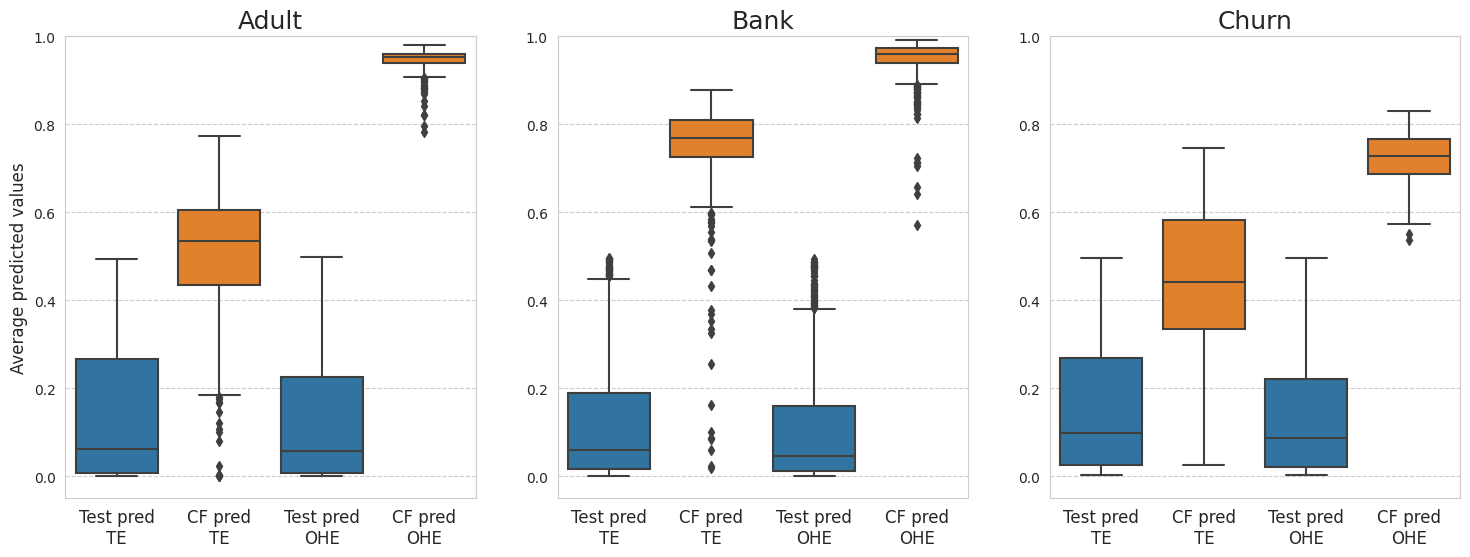

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

In [10]:
new_data_names = ['Adult', 'Bank', 'Churn']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6)) # (15, 3)
colors = ["tab:blue", "tab:orange", "tab:blue", "tab:orange"]

for idx, temp in enumerate(zip(data_names, targetenc_pred, targetenc_target_values_avgs, onehotenc_pred, onehotenc_target_values_avgs)):
    data_name, test_targetenc, targetenc_target_values_avg, test_oenhotenc, onehotenc_target_values_avg = temp

    print(np.mean(test_targetenc))
    print(np.std(test_targetenc))
    print(np.mean(targetenc_target_values_avg))
    print(np.std(targetenc_target_values_avg))
    print(np.mean(test_oenhotenc))
    print(np.mean(onehotenc_target_values_avg))
    print(np.std(onehotenc_target_values_avg))
    print('------------------')
    
    data1 = pd.DataFrame({
        '': ['Test pred\nTE']*len(test_targetenc) + ['CF pred\nTE']*len(targetenc_target_values_avg) + ['Test pred\nOHE']*len(test_oenhotenc) + ['CF pred\nOHE']*len(onehotenc_target_values_avg),
        'y': test_targetenc + targetenc_target_values_avg + test_oenhotenc + onehotenc_target_values_avg
    })

    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 3))
    sns.boxplot(x='', y='y', data=data1, palette=colors, ax=axs[idx])

    axs[idx].grid(axis="y", linestyle='--')
    if idx != 0:
        axs[idx].set_ylabel('')
    else:
        axs[idx].set_ylabel('Average predicted values', fontsize=12)
    axs[idx].set_ylim([-0.05, 1.0])
    axs[idx].set_xticklabels(axs[idx].get_xticklabels(), fontsize=12)
    axs[idx].set_title(new_data_names[idx], fontsize=18)

plt.tight_layout()
plt.show()


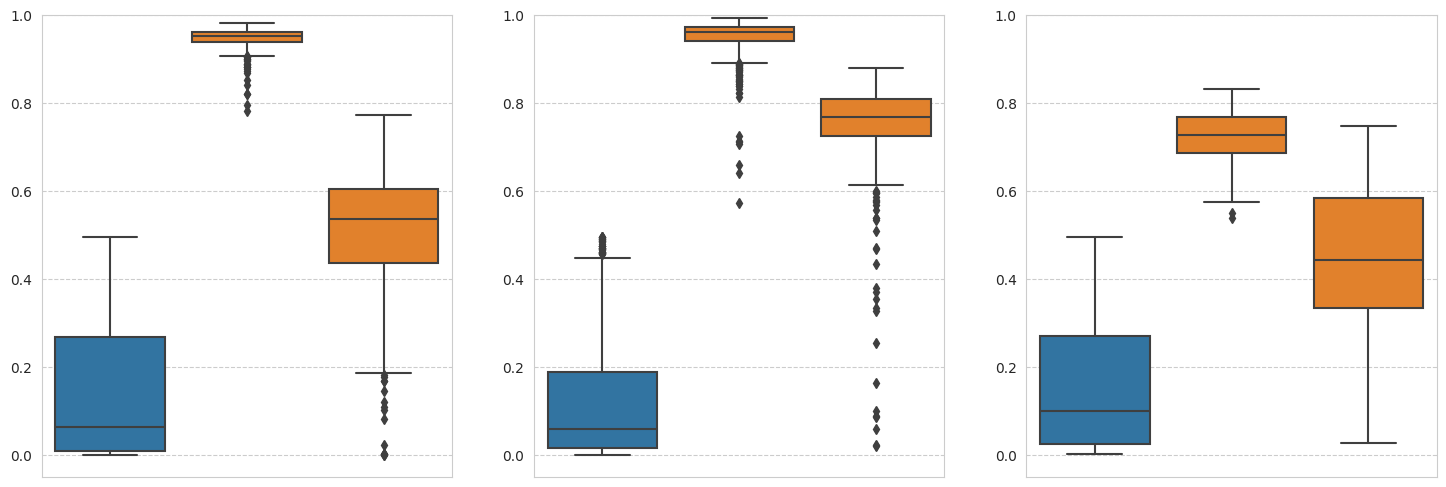

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

In [9]:
# スライド用
new_data_names = ['Adult', 'Bank', 'Churn']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6)) # (15, 3)
colors = ["tab:blue", "tab:orange", "tab:orange"]

for idx, temp in enumerate(zip(data_names, targetenc_pred, targetenc_target_values_avgs, onehotenc_pred, onehotenc_target_values_avgs)):
    data_name, test_targetenc, targetenc_target_values_avg, test_oenhotenc, onehotenc_target_values_avg = temp
    
    data1 = pd.DataFrame({
        '': ['Test pred\nTE']*len(test_targetenc) + ['CF pred\nOHE']*len(onehotenc_target_values_avg) + ['CF pred\nTE']*len(targetenc_target_values_avg),
        'y': test_targetenc + onehotenc_target_values_avg + targetenc_target_values_avg
    })

    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 3))
    sns.boxplot(x='', y='y', data=data1, palette=colors, ax=axs[idx])

    axs[idx].grid(axis="y", linestyle='--')
    axs[idx].set_ylabel('')
    axs[idx].set_ylim([-0.05, 1.0])
    # x軸は空白
    axs[idx].set_xticklabels(['']*len(axs[idx].get_xticklabels()), fontsize=12)
    # axs[idx].set_title(new_data_names[idx], fontsize=18)

plt.tight_layout()
plt.show()


In [15]:
# test_targetenc と test_oenhotenc の平均に差があるかどうかを検定
from scipy import stats

for idx, temp in enumerate(zip(data_names, targetenc_pred, targetenc_target_values_avgs, onehotenc_pred, onehotenc_target_values_avgs)):
    data_name, test_targetenc, targetenc_target_values_avg, test_oenhotenc, onehotenc_target_values_avg = temp
    # equal_var=False にすると Welch の t 検定になる
    print(stats.ttest_ind(test_targetenc, test_oenhotenc, equal_var=False))

Ttest_indResult(statistic=1.0591180806777256, pvalue=0.2898030493844968)
Ttest_indResult(statistic=1.5061628609091675, pvalue=0.13234216384309244)
Ttest_indResult(statistic=1.6591065222860026, pvalue=0.09741258028421601)


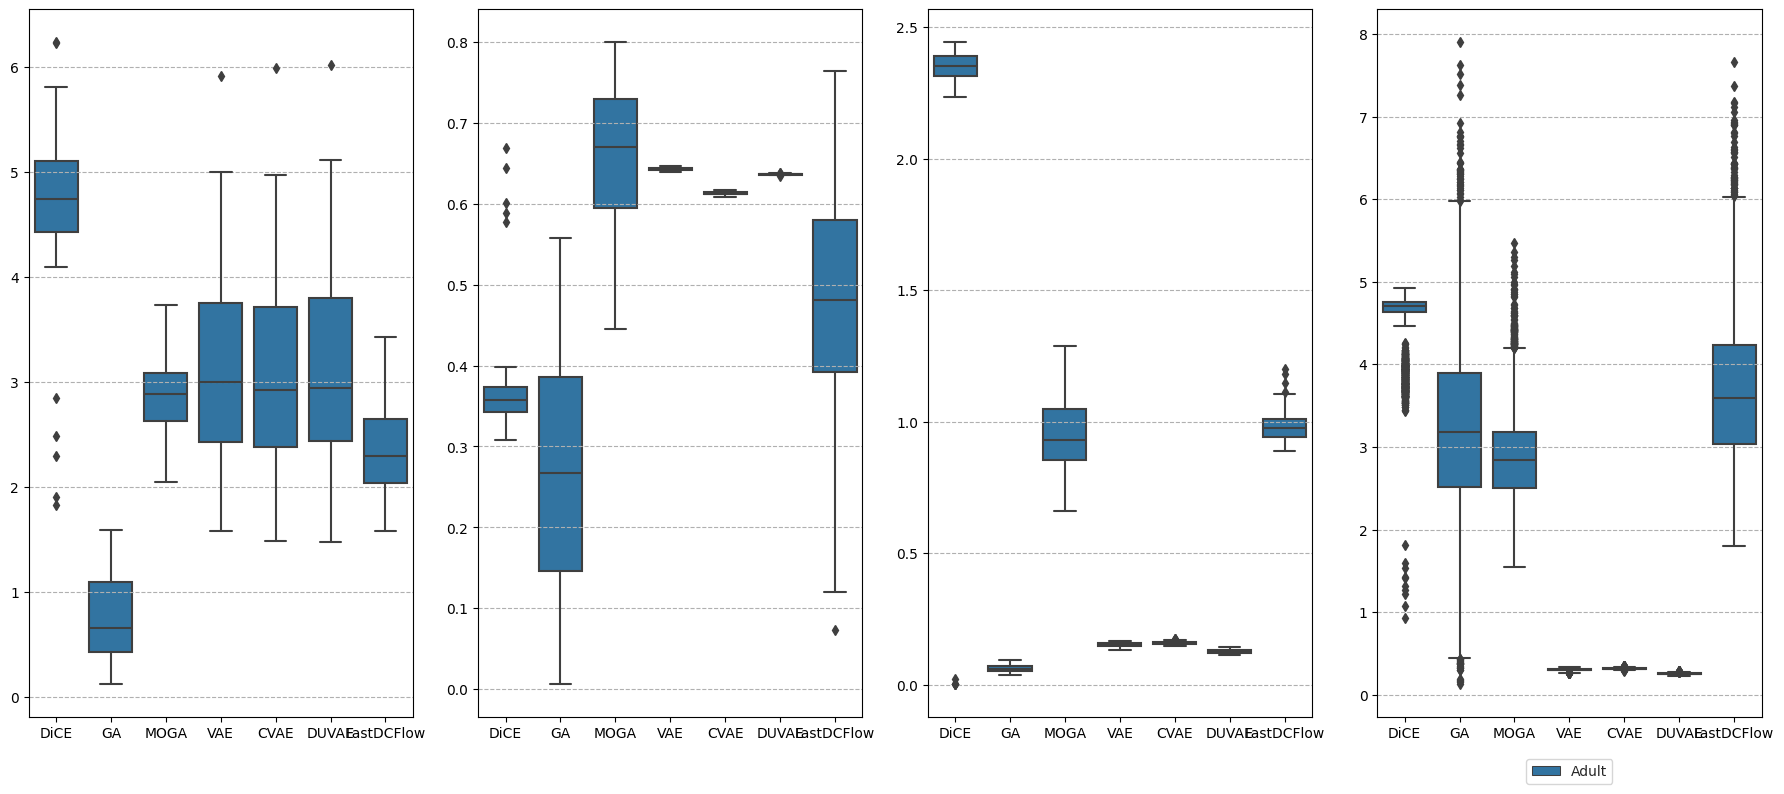

In [3]:
data_names = ['adult']
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(18, 8))

df_proximity = pd.DataFrame()
df_success_rate = pd.DataFrame()
df_inner_diviersity = pd.DataFrame()
df_outer_diviersity = pd.DataFrame()

for data_name in data_names:
    proximity = np.load(open(f'/workspace/Eval/npy/{data_name}_proximity.npy', 'rb'), allow_pickle=True)
    success_rate = np.load(open(f'/workspace/Eval/npy/{data_name}_cfs_pred.npy', 'rb'), allow_pickle=True)
    inner_diviersity = np.load(open(f'/workspace/Eval/npy/{data_name}_inner_diversity.npy', 'rb'), allow_pickle=True)
    outer_diviersity = np.load(open(f'/workspace/Eval/npy/{data_name}_outer_diversity.npy', 'rb'), allow_pickle=True)
    if data_name == 'adult':
        data_name = 'Adult'
    elif data_name == 'bank':
        data_name = 'Bank'
    elif data_name == 'turnover':
        data_name = 'Churn'
    # concat data
    data_proximity = pd.DataFrame({
        'x': ['DiCE']*len(proximity[0]) + ['GeCo']*len(proximity[1]) + ['MOC']*len(proximity[2]) + ['VAE']*len(proximity[3]) + ['CF_CVAE']*len(proximity[4]) + ['CF_DUVAE']*len(proximity[5]) + ['FastDCFlow']*len(proximity[6]),
        'Proximity': np.concatenate([proximity[0], proximity[1], proximity[2], proximity[3], proximity[4], proximity[5], proximity[6]]),
        'data_name': [data_name]*len(proximity[0]) + [data_name]*len(proximity[1]) + [data_name]*len(proximity[2]) + [data_name]*len(proximity[3]) + [data_name]*len(proximity[4]) + [data_name]*len(proximity[5]) + [data_name]*len(proximity[6])
    })
    df_proximity = pd.concat([df_proximity, data_proximity], axis=0)
    
    data_success_rate = pd.DataFrame({
        'x': ['DiCE']*len(success_rate[0]) + ['GeCo']*len(success_rate[1]) + ['MOC']*len(success_rate[2]) + ['VAE']*len(success_rate[3]) + ['CF_CVAE']*len(success_rate[4]) + ['CF_DUVAE']*len(success_rate[5]) + ['FastDCFlow']*len(success_rate[6]),
        'CF prediction mean': np.concatenate([success_rate[0], success_rate[1], success_rate[2], success_rate[3], success_rate[4], success_rate[5], success_rate[6]]),
        'data_name': [data_name]*len(success_rate[0]) + [data_name]*len(success_rate[1]) + [data_name]*len(success_rate[2]) + [data_name]*len(success_rate[3]) + [data_name]*len(success_rate[4]) + [data_name]*len(success_rate[5]) + [data_name]*len(success_rate[6])
    })
    df_success_rate = pd.concat([df_success_rate, data_success_rate], axis=0)
    
    data_inner_diviersity = pd.DataFrame({
        'x': ['DiCE']*len(inner_diviersity[0]) + ['GeCo']*len(inner_diviersity[1]) + ['MOC']*len(inner_diviersity[2]) + ['VAE']*len(inner_diviersity[3]) + ['CF_CVAE']*len(inner_diviersity[4]) + ['CF_DUVAE']*len(inner_diviersity[5]) + ['FastDCFlow']*len(inner_diviersity[6]),
        'Inner_diviersity': np.concatenate([inner_diviersity[0], inner_diviersity[1], inner_diviersity[2], inner_diviersity[3], inner_diviersity[4], inner_diviersity[5], inner_diviersity[6]]),
        'data_name': [data_name]*len(inner_diviersity[0]) + [data_name]*len(inner_diviersity[1]) + [data_name]*len(inner_diviersity[2]) + [data_name]*len(inner_diviersity[3]) + [data_name]*len(inner_diviersity[4]) + [data_name]*len(inner_diviersity[5]) + [data_name]*len(inner_diviersity[6])
    })
    df_inner_diviersity = pd.concat([df_inner_diviersity, data_inner_diviersity], axis=0)
    
    data_outer_diviersity = pd.DataFrame({
        'x': ['DiCE']*len(outer_diviersity[0]) + ['GeCo']*len(outer_diviersity[1]) + ['MOC']*len(outer_diviersity[2]) + ['VAE']*len(outer_diviersity[3]) + ['CF_CVAE']*len(outer_diviersity[4]) + ['CF_DUVAE']*len(outer_diviersity[5]) + ['FastDCFlow']*len(outer_diviersity[6]),
        'Outer_diviersity': np.concatenate([outer_diviersity[0], outer_diviersity[1], outer_diviersity[2], outer_diviersity[3], outer_diviersity[4], outer_diviersity[5], outer_diviersity[6]]),
        'data_name': [data_name]*len(outer_diviersity[0]) + [data_name]*len(outer_diviersity[1]) + [data_name]*len(outer_diviersity[2]) + [data_name]*len(outer_diviersity[3]) + [data_name]*len(outer_diviersity[4]) + [data_name]*len(outer_diviersity[5]) + [data_name]*len(outer_diviersity[6])
    })
    df_outer_diviersity = pd.concat([df_outer_diviersity, data_outer_diviersity], axis=0)
    
for idx in range(4):
    if idx == 0:
        sns.set_style("whitegrid")
        sns.boxplot(x='x', y='Proximity', data=df_proximity, hue='data_name', ax=axs[idx])
        axs[idx].grid(axis="y", linestyle='--')
        # axs[idx].set_ylabel('Proximity', fontsize=14)
    elif idx == 1:
        sns.set_style("whitegrid")
        sns.boxplot(x='x', y='Success rate', data=df_success_rate, hue='data_name', ax=axs[idx])
        axs[idx].grid(axis="y", linestyle='--')
        # axs[idx].set_ylabel('CF prediction mean', fontsize=14)
    elif idx == 2:
        sns.set_style("whitegrid")
        sns.boxplot(x='x', y='Inner_diviersity', data=df_inner_diviersity, hue='data_name', ax=axs[idx])
        axs[idx].grid(axis="y", linestyle='--')
        # axs[idx].set_ylabel('Inner diviersity', fontsize=14)
    elif idx == 3:
        sns.set_style("whitegrid")
        sns.boxplot(x='x', y='Outer_diviersity', data=df_outer_diviersity, hue='data_name', ax=axs[idx])
        axs[idx].grid(axis="y", linestyle='--')
        # axs[idx].set_ylabel('Outer diviersity', fontsize=14)
    axs[idx].set_xlabel('')
    axs[idx].set_ylabel('')
    if idx == 3:
        axs[idx].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
    else:
        axs[idx].legend([],[], frameon=False)
plt.tight_layout()
plt.show()


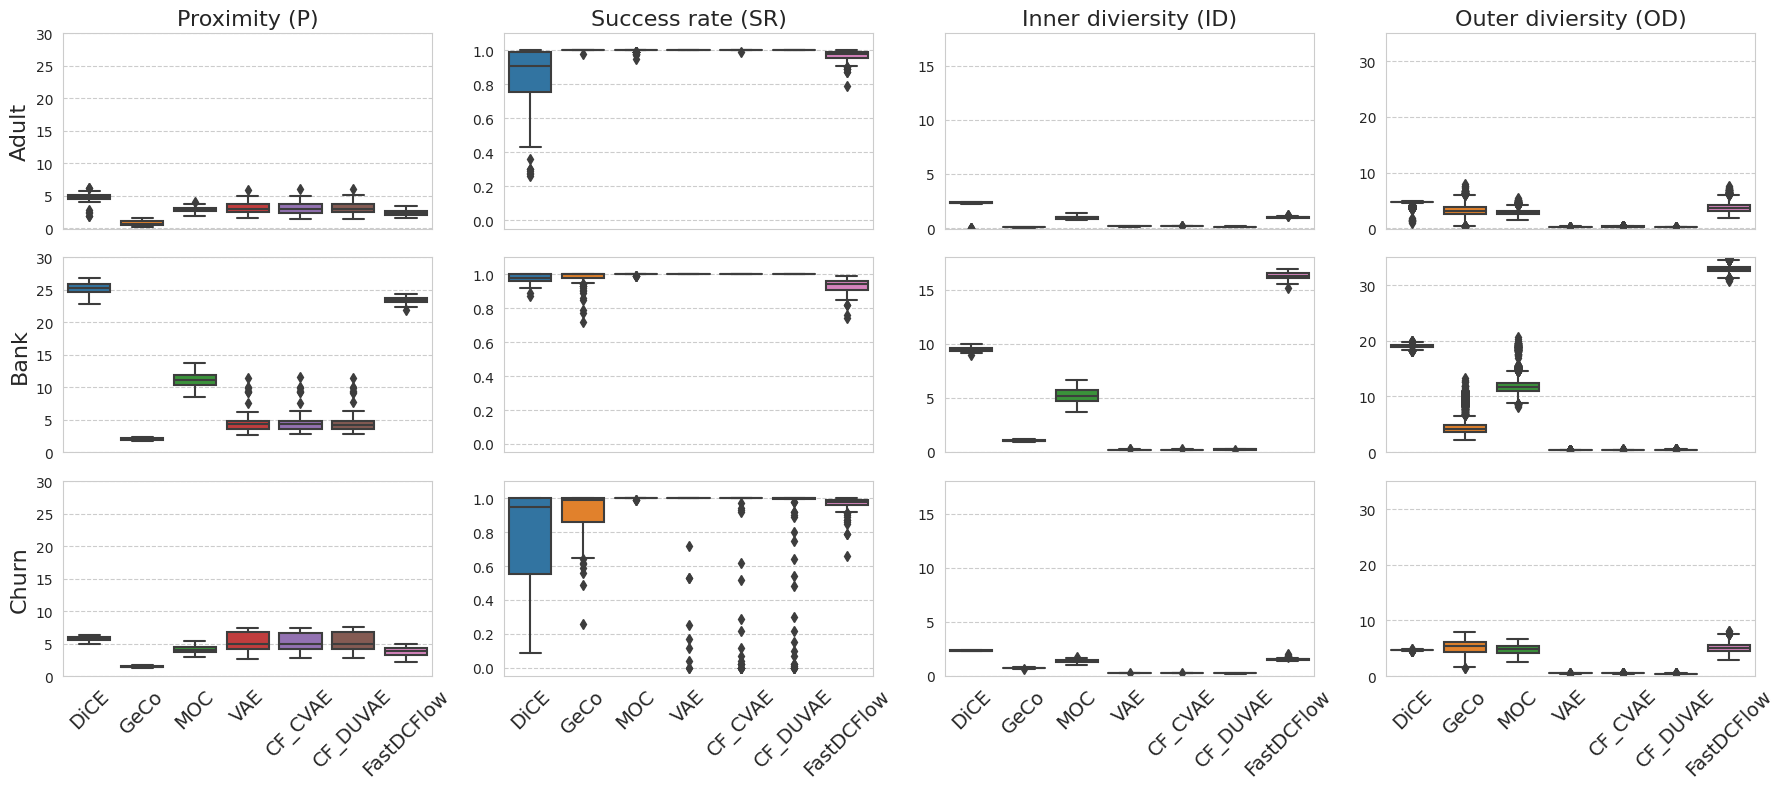

In [2]:
data_names = ['adult', 'bank', 'turnover']
sns.set_style("whitegrid")
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(18, 8))

df_proximity = pd.DataFrame()
df_success_rate = pd.DataFrame()
df_inner_diviersity = pd.DataFrame()
df_outer_diviersity = pd.DataFrame()

for id, data_name in enumerate(data_names):
    proximity = np.load(open(f'/workspace/Eval/npy/{data_name}_proximity.npy', 'rb'), allow_pickle=True)
    success_rate = np.load(open(f'/workspace/Eval/npy/{data_name}_success_rate.npy', 'rb'), allow_pickle=True)
    inner_diviersity = np.load(open(f'/workspace/Eval/npy/{data_name}_inner_diversity.npy', 'rb'), allow_pickle=True)
    outer_diviersity = np.load(open(f'/workspace/Eval/npy/{data_name}_outer_diversity.npy', 'rb'), allow_pickle=True)
    if data_name == 'adult':
        data_name = 'Adult'
    elif data_name == 'bank':
        data_name = 'Bank'
    elif data_name == 'turnover':
        data_name = 'Churn'
    # concat data
    data_proximity = pd.DataFrame({
        'x': ['DiCE']*len(proximity[0]) + ['GeCo']*len(proximity[1]) + ['MOC']*len(proximity[2]) + ['VAE']*len(proximity[3]) + ['CF_CVAE']*len(proximity[4]) + ['CF_DUVAE']*len(proximity[5]) + ['FastDCFlow']*len(proximity[6]),
        'Proximity': np.concatenate([proximity[0], proximity[1], proximity[2], proximity[3], proximity[4], proximity[5], proximity[6]]),
        'data_name': [data_name]*len(proximity[0]) + [data_name]*len(proximity[1]) + [data_name]*len(proximity[2]) + [data_name]*len(proximity[3]) + [data_name]*len(proximity[4]) + [data_name]*len(proximity[5]) + [data_name]*len(proximity[6])
    })    
    data_success_rate = pd.DataFrame({
        'x': ['DiCE']*len(success_rate[0]) + ['GeCo']*len(success_rate[1]) + ['MOC']*len(success_rate[2]) + ['VAE']*len(success_rate[3]) + ['CF_CVAE']*len(success_rate[4]) + ['CF_DUVAE']*len(success_rate[5]) + ['FastDCFlow']*len(success_rate[6]),
        'Success rate': np.concatenate([success_rate[0], success_rate[1], success_rate[2], success_rate[3], success_rate[4], success_rate[5], success_rate[6]]),
        'data_name': [data_name]*len(success_rate[0]) + [data_name]*len(success_rate[1]) + [data_name]*len(success_rate[2]) + [data_name]*len(success_rate[3]) + [data_name]*len(success_rate[4]) + [data_name]*len(success_rate[5]) + [data_name]*len(success_rate[6])
    })    
    data_inner_diviersity = pd.DataFrame({
        'x': ['DiCE']*len(inner_diviersity[0]) + ['GeCo']*len(inner_diviersity[1]) + ['MOC']*len(inner_diviersity[2]) + ['VAE']*len(inner_diviersity[3]) + ['CF_CVAE']*len(inner_diviersity[4]) + ['CF_DUVAE']*len(inner_diviersity[5]) + ['FastDCFlow']*len(inner_diviersity[6]),
        'Inner_diviersity': np.concatenate([inner_diviersity[0], inner_diviersity[1], inner_diviersity[2], inner_diviersity[3], inner_diviersity[4], inner_diviersity[5], inner_diviersity[6]]),
        'data_name': [data_name]*len(inner_diviersity[0]) + [data_name]*len(inner_diviersity[1]) + [data_name]*len(inner_diviersity[2]) + [data_name]*len(inner_diviersity[3]) + [data_name]*len(inner_diviersity[4]) + [data_name]*len(inner_diviersity[5]) + [data_name]*len(inner_diviersity[6])
    })
    data_outer_diviersity = pd.DataFrame({
        'x': ['DiCE']*len(outer_diviersity[0]) + ['GeCo']*len(outer_diviersity[1]) + ['MOC']*len(outer_diviersity[2]) + ['VAE']*len(outer_diviersity[3]) + ['CF_CVAE']*len(outer_diviersity[4]) + ['CF_DUVAE']*len(outer_diviersity[5]) + ['FastDCFlow']*len(outer_diviersity[6]),
        'Outer_diviersity': np.concatenate([outer_diviersity[0], outer_diviersity[1], outer_diviersity[2], outer_diviersity[3], outer_diviersity[4], outer_diviersity[5], outer_diviersity[6]]),
        'data_name': [data_name]*len(outer_diviersity[0]) + [data_name]*len(outer_diviersity[1]) + [data_name]*len(outer_diviersity[2]) + [data_name]*len(outer_diviersity[3]) + [data_name]*len(outer_diviersity[4]) + [data_name]*len(outer_diviersity[5]) + [data_name]*len(outer_diviersity[6])
    })    
    for idx in range(4):
        if idx%4 == 0:
            sns.boxplot(x='x', y='Proximity', data=data_proximity, ax=axs[id, idx])
            axs[id, idx].set_ylabel(data_name, fontsize=16)
            axs[id, idx].set_ylim([-0.05, 30])
            if id == 0:
                axs[id, idx].set_title('Proximity (P)', fontsize=16)
        elif idx%4 == 1:
            sns.boxplot(x='x', y='Success rate', data=data_success_rate, ax=axs[id, idx])
            axs[id, idx].set_ylabel('')
            axs[id, idx].set_ylim([-0.05, 1.1])
            if id == 0:
                axs[id, idx].set_title('Success rate (SR)', fontsize=16)
        elif idx%4 == 2:
            sns.boxplot(x='x', y='Inner_diviersity', data=data_inner_diviersity, ax=axs[id, idx])
            axs[id, idx].set_ylabel('')
            axs[id, idx].set_ylim([-0.05, 18])
            if id == 0:
                axs[id, idx].set_title('Inner diviersity (ID)', fontsize=16)
        elif idx%4 == 3:
            sns.boxplot(x='x', y='Outer_diviersity', data=data_outer_diviersity, ax=axs[id, idx])
            axs[id, idx].set_ylabel('')
            axs[id, idx].set_ylim([-0.05, 35])
            if id == 0:
                axs[id, idx].set_title('Outer diviersity (OD)', fontsize=16)  
        axs[id, idx].grid(axis="y", linestyle='--')
        if id != 2:
            axs[id, idx].set_xticklabels([])
        else:
            axs[id, idx].tick_params(axis='x', rotation=45)
            # fontsize
            for tick in axs[id, idx].xaxis.get_major_ticks():
                tick.label1.set_fontsize(14)
        axs[id, idx].set_xlabel('')
plt.tight_layout()
# plt.savefig('/workspace/Eval/notebook/figs/boxplot.eps', bbox_inches='tight', pad_inches=0.05)
plt.show()

In [2]:
data_names = ['adult', 'bank', 'churn']

df_proximity = pd.DataFrame()
df_success_rate = pd.DataFrame()
df_inner_diviersity = pd.DataFrame()
df_outer_diviersity = pd.DataFrame()

for id, data_name in enumerate(data_names):
    proximity = np.load(open(f'/workspace/Eval/npy/{data_name}_proximity.npy', 'rb'), allow_pickle=True)
    success_rate = np.load(open(f'/workspace/Eval/npy/{data_name}_success_rate.npy', 'rb'), allow_pickle=True)
    inner_diviersity = np.load(open(f'/workspace/Eval/npy/{data_name}_inner_diversity.npy', 'rb'), allow_pickle=True)
    outer_diviersity = np.load(open(f'/workspace/Eval/npy/{data_name}_outer_diversity.npy', 'rb'), allow_pickle=True)
    print(data_name)
    print('------------------Proximity------------------')
    print('DiCE')
    print(np.std(proximity[0]))
    print('GeCo')
    print(np.std(proximity[1]))
    print('MOC')
    print(np.std(proximity[2]))
    print('CF_VAE')
    print(np.std(proximity[3]))
    print('CF_CVAE')
    print(np.std(proximity[4]))
    print('CF_DUVAE')
    print(np.std(proximity[5]))
    print('FastDCFlow')
    print(np.std(proximity[6]))
    print('------------------Validity------------------')
    print('DiCE')
    print(np.std(success_rate[0]))
    print('GeCo')
    print(np.std(success_rate[1]))
    print('MOC')
    print(np.std(success_rate[2]))
    print('CF_VAE')
    print(np.std(success_rate[3]))
    print('CF_CVAE')
    print(np.std(success_rate[4]))
    print('CF_DUVAE')
    print(np.std(success_rate[5]))
    print('FastDCFlow')
    print(np.std(success_rate[6]))
    print('------------------Inner diviersity------------------')
    print('DiCE')
    print(np.std(inner_diviersity[0]))
    print('GeCo')
    print(np.std(inner_diviersity[1]))
    print('MOC')
    print(np.std(inner_diviersity[2]))
    print('CF_VAE')
    print(np.std(inner_diviersity[3]))
    print('CF_CVAE')
    print(np.std(inner_diviersity[4]))
    print('CF_DUVAE')
    print(np.std(inner_diviersity[5]))
    print('FastDCFlow')
    print(np.std(inner_diviersity[6]))
    print('------------------Outer diviersity------------------')
    print('DiCE')
    print(np.std(outer_diviersity[0]))
    print('GeCo')
    print(np.std(outer_diviersity[1]))
    print('MOC')
    print(np.std(outer_diviersity[2]))
    print('CF_VAE')
    print(np.std(outer_diviersity[3]))
    print('CF_CVAE')
    print(np.std(outer_diviersity[4]))
    print('CF_DUVAE')
    print(np.std(outer_diviersity[5]))
    print('FastDCFlow')
    print(np.std(outer_diviersity[6]))
    print('------------------')

adult
------------------Proximity------------------
DiCE
0.69762087
GeCo
0.39423826
MOC
0.41187283
CF_VAE
0.85660326
CF_CVAE
0.86973387
CF_DUVAE
0.86880296
FastDCFlow
0.49806595
------------------Validity------------------
DiCE
0.20912338463213526
GeCo
0.0019899748742132416
MOC
0.007332121111929352
CF_VAE
0.0
CF_CVAE
0.0009949874371066212
CF_DUVAE
0.0
FastDCFlow
0.040804411526206334
------------------Inner diviersity------------------
DiCE
0.5222440157860164
GeCo
0.012144694236626568
MOC
0.1328087187597234
CF_VAE
0.009166058912827645
CF_CVAE
0.005716282536517904
CF_DUVAE
0.006818577374705382
FastDCFlow
0.040869182890623745
------------------Outer diviersity------------------
DiCE
0.31357005
GeCo
1.0787253
MOC
0.5345038
CF_VAE
0.012791356
CF_CVAE
0.008052715
CF_DUVAE
0.009677267
FastDCFlow
0.94084114
------------------
bank
------------------Proximity------------------
DiCE
0.84038204
GeCo
0.15734836
MOC
1.1669751
CF_VAE
1.5638678
CF_CVAE
1.5726837
CF_DUVAE
1.5746684
FastDCFlow
0.204983

In [6]:
data_names = ['adult', 'bank', 'turnover']
model_names = ['DiCE', 'CF_GA', 'CF_MOGA', 'CF_VAE', 'CF_CVAE', 'CF_DUVAE', 'CF_Flow']

for id, data_name in enumerate(data_names):
    with open(configuration_for_proj[f'cf_flow_model_targetenc_{data_name}_times'], 'rb') as f:
        times = json.load(f)
    std = np.std(times)
    print(data_name)
    print(std)

adult
0.028144976865209302
bank
0.02975816921303661
turnover
0.030944061095486648


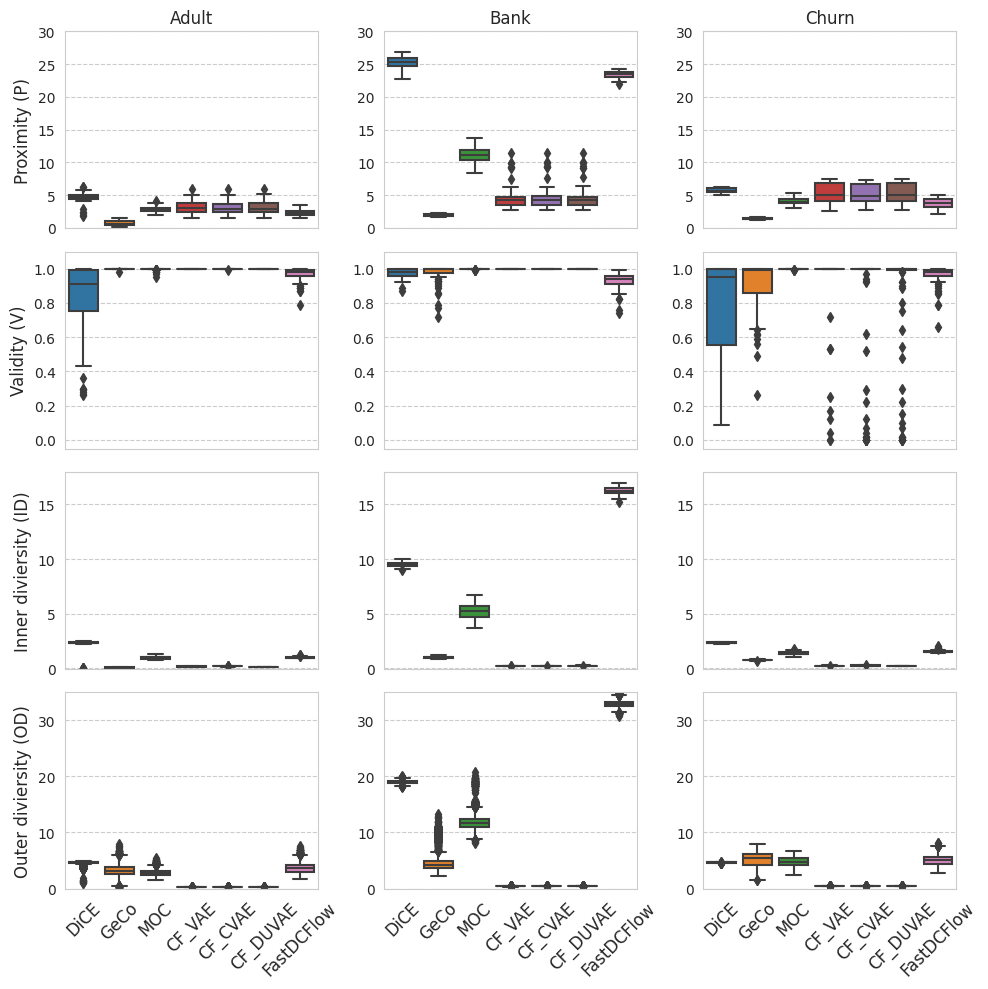

In [16]:
data_names = ['adult', 'bank', 'turnover']
sns.set_style("whitegrid")
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

df_proximity = pd.DataFrame()
df_success_rate = pd.DataFrame()
df_inner_diviersity = pd.DataFrame()
df_outer_diviersity = pd.DataFrame()

for id, data_name in enumerate(data_names):
    proximity = np.load(open(f'/workspace/Eval/npy/{data_name}_proximity.npy', 'rb'), allow_pickle=True)
    success_rate = np.load(open(f'/workspace/Eval/npy/{data_name}_success_rate.npy', 'rb'), allow_pickle=True)
    inner_diviersity = np.load(open(f'/workspace/Eval/npy/{data_name}_inner_diversity.npy', 'rb'), allow_pickle=True)
    outer_diviersity = np.load(open(f'/workspace/Eval/npy/{data_name}_outer_diversity.npy', 'rb'), allow_pickle=True)
    if data_name == 'adult':
        data_name = 'Adult'
    elif data_name == 'bank':
        data_name = 'Bank'
    elif data_name == 'turnover':
        data_name = 'Churn'
    # concat data
    data_proximity = pd.DataFrame({
        'x': ['DiCE']*len(proximity[0]) + ['GeCo']*len(proximity[1]) + ['MOC']*len(proximity[2]) + ['CF_VAE']*len(proximity[3]) + ['CF_CVAE']*len(proximity[4]) + ['CF_DUVAE']*len(proximity[5]) + ['FastDCFlow']*len(proximity[6]),
        'Proximity': np.concatenate([proximity[0], proximity[1], proximity[2], proximity[3], proximity[4], proximity[5], proximity[6]]),
        'data_name': [data_name]*len(proximity[0]) + [data_name]*len(proximity[1]) + [data_name]*len(proximity[2]) + [data_name]*len(proximity[3]) + [data_name]*len(proximity[4]) + [data_name]*len(proximity[5]) + [data_name]*len(proximity[6])
    })    
    data_success_rate = pd.DataFrame({
        'x': ['DiCE']*len(success_rate[0]) + ['GeCo']*len(success_rate[1]) + ['MOC']*len(success_rate[2]) + ['CF_VAE']*len(success_rate[3]) + ['CF_CVAE']*len(success_rate[4]) + ['CF_DUVAE']*len(success_rate[5]) + ['FastDCFlow']*len(success_rate[6]),
        'Validity': np.concatenate([success_rate[0], success_rate[1], success_rate[2], success_rate[3], success_rate[4], success_rate[5], success_rate[6]]),
        'data_name': [data_name]*len(success_rate[0]) + [data_name]*len(success_rate[1]) + [data_name]*len(success_rate[2]) + [data_name]*len(success_rate[3]) + [data_name]*len(success_rate[4]) + [data_name]*len(success_rate[5]) + [data_name]*len(success_rate[6])
    })    
    data_inner_diviersity = pd.DataFrame({
        'x': ['DiCE']*len(inner_diviersity[0]) + ['GeCo']*len(inner_diviersity[1]) + ['MOC']*len(inner_diviersity[2]) + ['CF_VAE']*len(inner_diviersity[3]) + ['CF_CVAE']*len(inner_diviersity[4]) + ['CF_DUVAE']*len(inner_diviersity[5]) + ['FastDCFlow']*len(inner_diviersity[6]),
        'Inner_diviersity': np.concatenate([inner_diviersity[0], inner_diviersity[1], inner_diviersity[2], inner_diviersity[3], inner_diviersity[4], inner_diviersity[5], inner_diviersity[6]]),
        'data_name': [data_name]*len(inner_diviersity[0]) + [data_name]*len(inner_diviersity[1]) + [data_name]*len(inner_diviersity[2]) + [data_name]*len(inner_diviersity[3]) + [data_name]*len(inner_diviersity[4]) + [data_name]*len(inner_diviersity[5]) + [data_name]*len(inner_diviersity[6])
    })
    data_outer_diviersity = pd.DataFrame({
        'x': ['DiCE']*len(outer_diviersity[0]) + ['GeCo']*len(outer_diviersity[1]) + ['MOC']*len(outer_diviersity[2]) + ['CF_VAE']*len(outer_diviersity[3]) + ['CF_CVAE']*len(outer_diviersity[4]) + ['CF_DUVAE']*len(outer_diviersity[5]) + ['FastDCFlow']*len(outer_diviersity[6]),
        'Outer_diviersity': np.concatenate([outer_diviersity[0], outer_diviersity[1], outer_diviersity[2], outer_diviersity[3], outer_diviersity[4], outer_diviersity[5], outer_diviersity[6]]),
        'data_name': [data_name]*len(outer_diviersity[0]) + [data_name]*len(outer_diviersity[1]) + [data_name]*len(outer_diviersity[2]) + [data_name]*len(outer_diviersity[3]) + [data_name]*len(outer_diviersity[4]) + [data_name]*len(outer_diviersity[5]) + [data_name]*len(outer_diviersity[6])
    })    
    for idx in range(4):
        if idx%4 == 0:
            sns.boxplot(x='x', y='Proximity', data=data_proximity, ax=axs[idx, id])
            axs[idx, id].set_ylabel('')
            axs[idx, id].set_title(data_name, fontsize=12)
            axs[idx, id].set_ylim([-0.05, 30])
            if id == 0:
                axs[idx, id].set_ylabel('Proximity (P)', fontsize=12)
        elif idx%4 == 1:
            sns.boxplot(x='x', y='Validity', data=data_success_rate, ax=axs[idx, id])
            axs[idx, id].set_ylabel('')
            axs[idx, id].set_ylim([-0.05, 1.1])
            if id == 0:
                axs[idx, id].set_ylabel('Validity (V)', fontsize=12)
        elif idx%4 == 2:
            sns.boxplot(x='x', y='Inner_diviersity', data=data_inner_diviersity, ax=axs[idx, id])
            axs[idx, id].set_ylabel('')
            axs[idx, id].set_ylim([-0.05, 18])
            if id == 0:
                axs[idx, id].set_ylabel('Inner diviersity (ID)', fontsize=12)
        elif idx%4 == 3:
            sns.boxplot(x='x', y='Outer_diviersity', data=data_outer_diviersity, ax=axs[idx, id])
            axs[idx, id].set_ylabel('')
            axs[idx, id].set_ylim([-0.05, 35])
            if id == 0:
                axs[idx, id].set_ylabel('Outer diviersity (OD)', fontsize=12)  
        axs[idx, id].grid(axis="y", linestyle='--')
        if idx != 3:
            axs[idx, id].set_xticklabels([])
        else:
            axs[idx, id].tick_params(axis='x', rotation=45)
            # fontsize
            for tick in axs[idx, id].xaxis.get_major_ticks():
                tick.label1.set_fontsize(12)
        axs[idx, id].set_xlabel('')
plt.tight_layout()
# plt.savefig('/workspace/Eval/notebook/figs/boxplot.eps', bbox_inches='tight', pad_inches=0.05)
plt.show()